# Step1: Data Loading

In [ ]:
!pip install squarify

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DM/Project/Adult.csv')


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 32561 Columns: 15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [ ]:
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [ ]:
income = df['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

income
<=50K    75.92 %
>50K     24.08 %
Name: proportion, dtype: object


Observations
*   The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
*   The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.



# Step2: Data Visualization

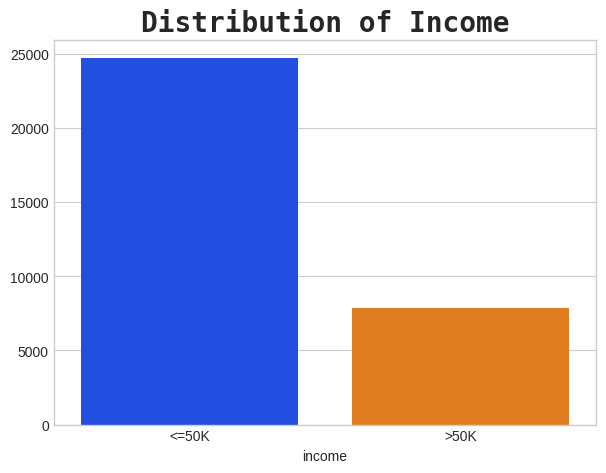

In [ ]:
income = df['income'].value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'income' is a pandas Series
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(x=income.index, y=income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

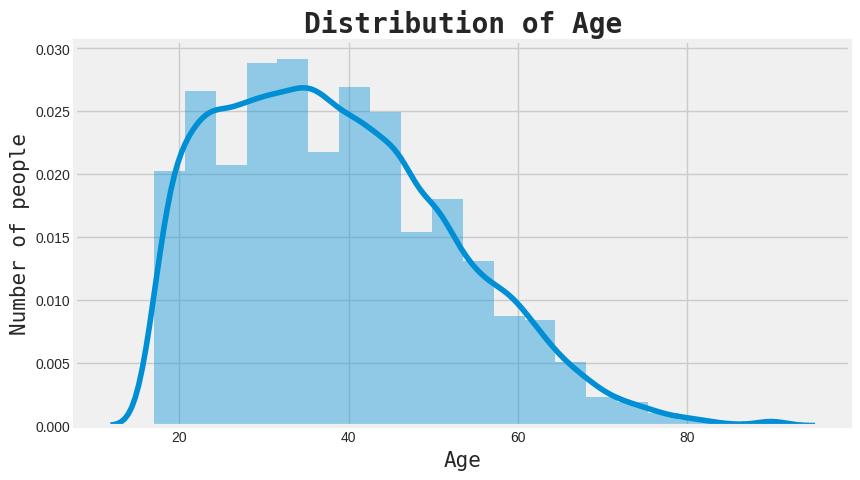

In [ ]:
age = df['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

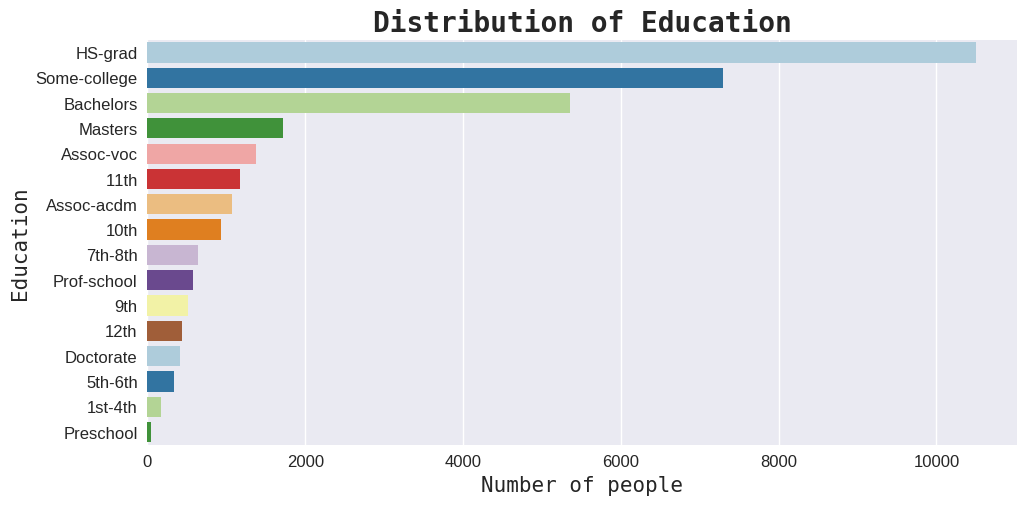

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame and 'education' is a column in it
edu = df['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu.values, y=edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


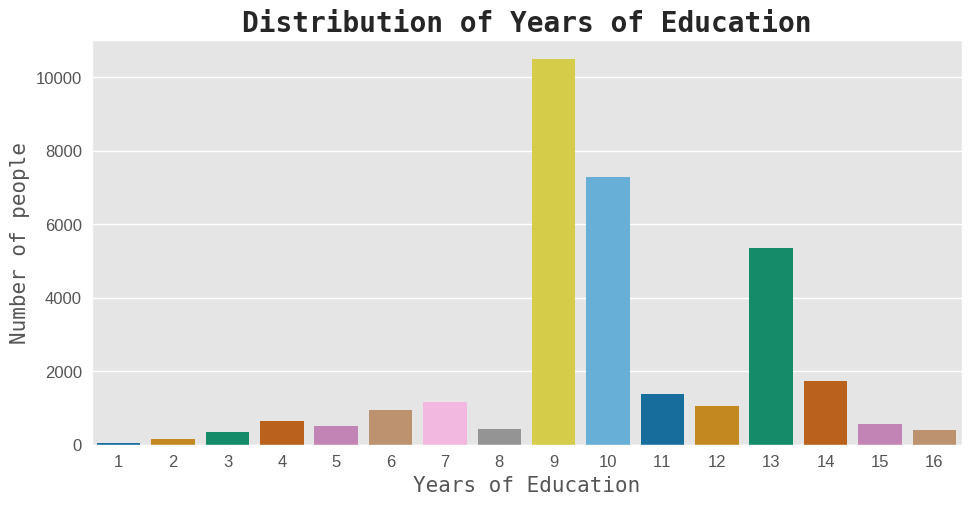

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame and 'education.num' is a column in it
edu_num = df['education.num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_num.index, y=edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


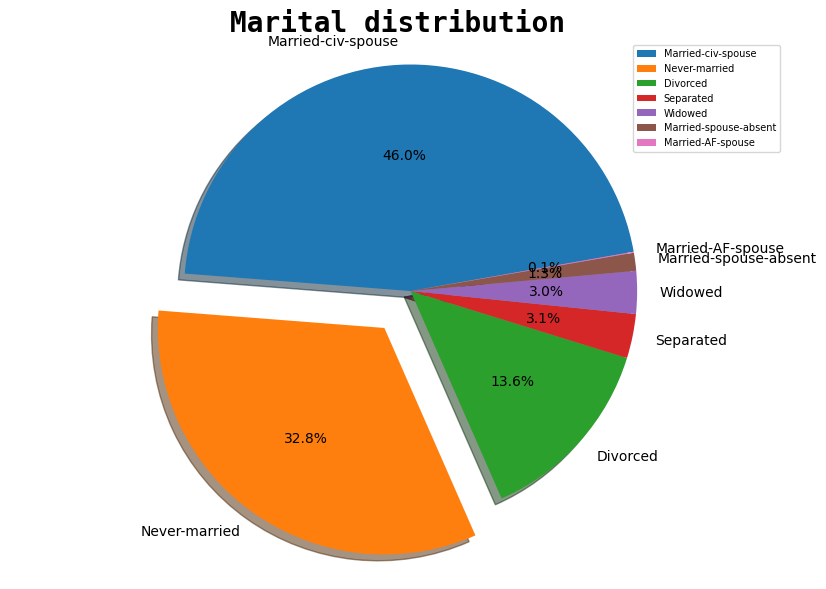

In [ ]:
marital = df['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

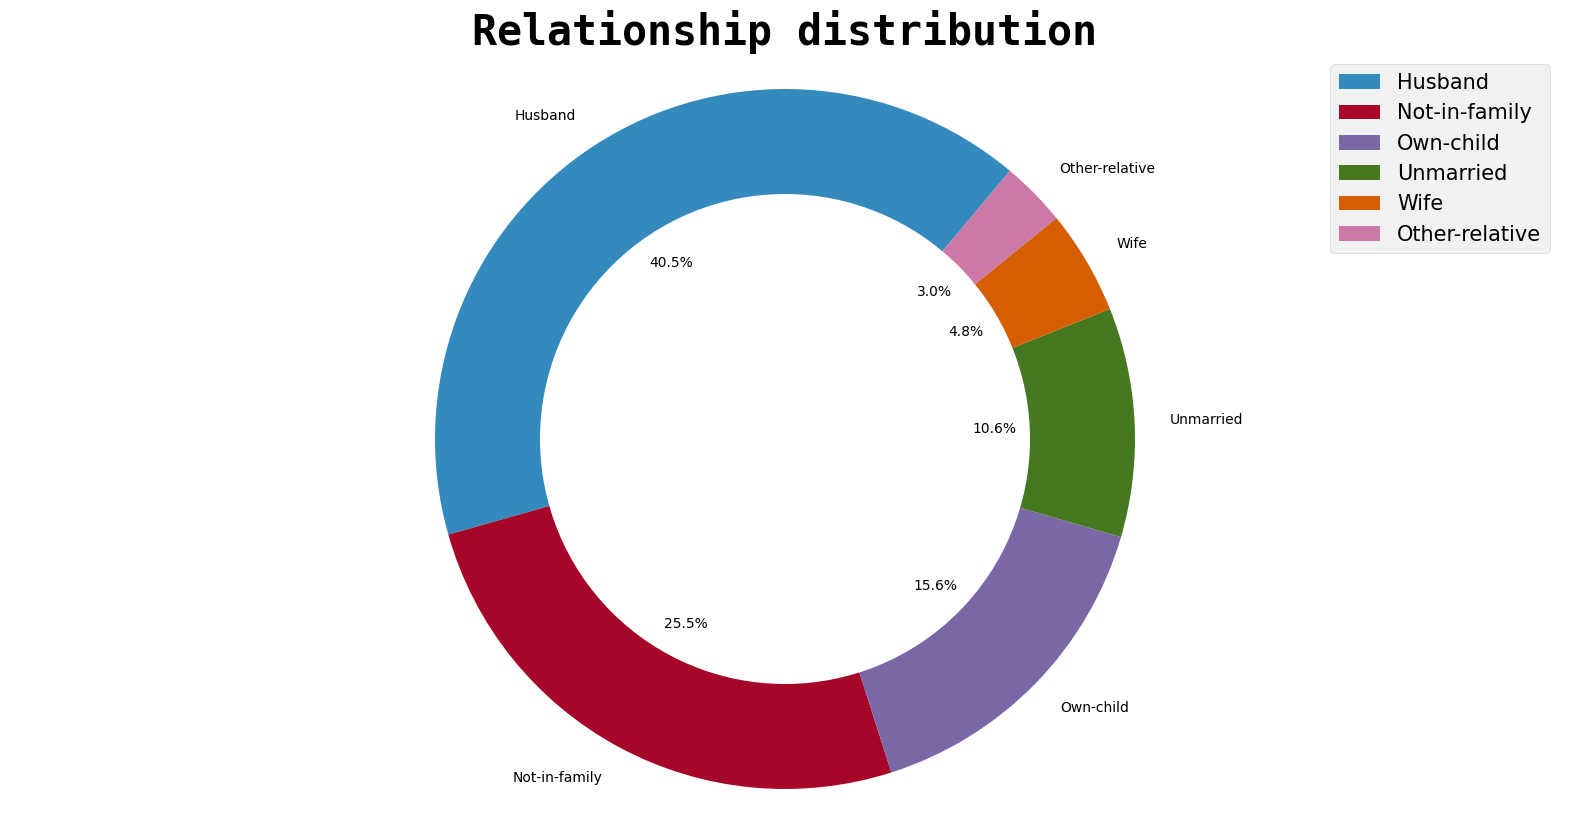

In [ ]:
relation = df['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

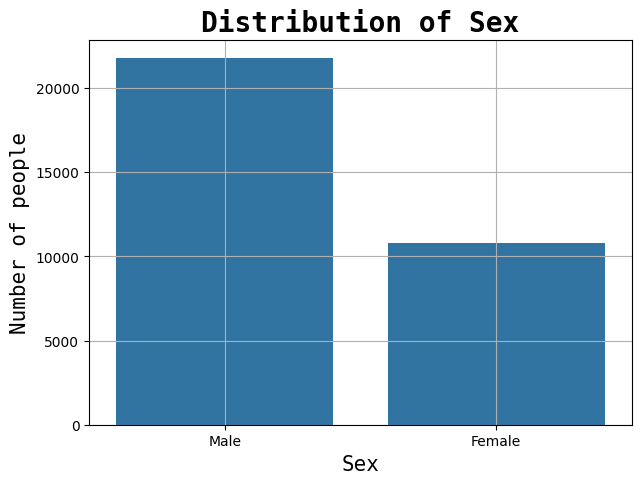

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame and 'sex' is a column in it
sex = df['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(x=sex.index, y=sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()


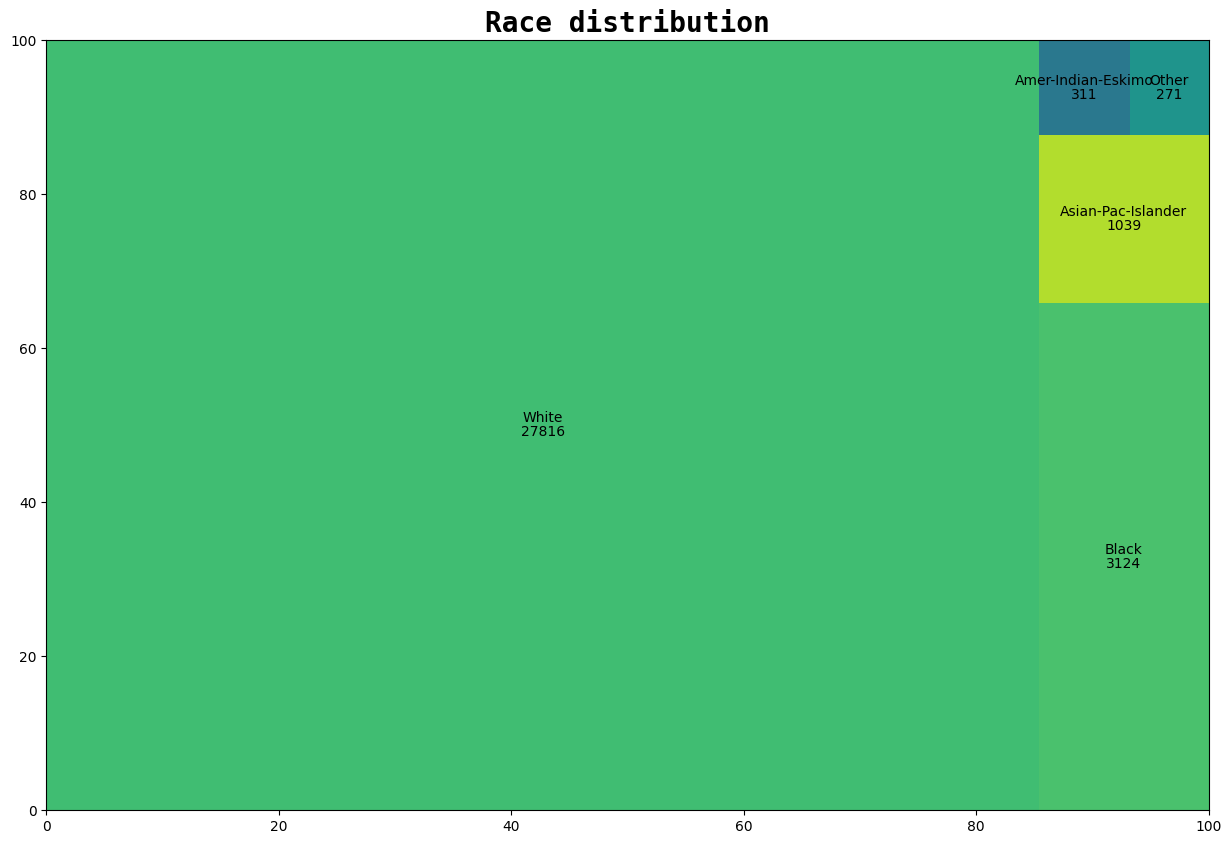

In [ ]:
import squarify
race = df['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(15, 10))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

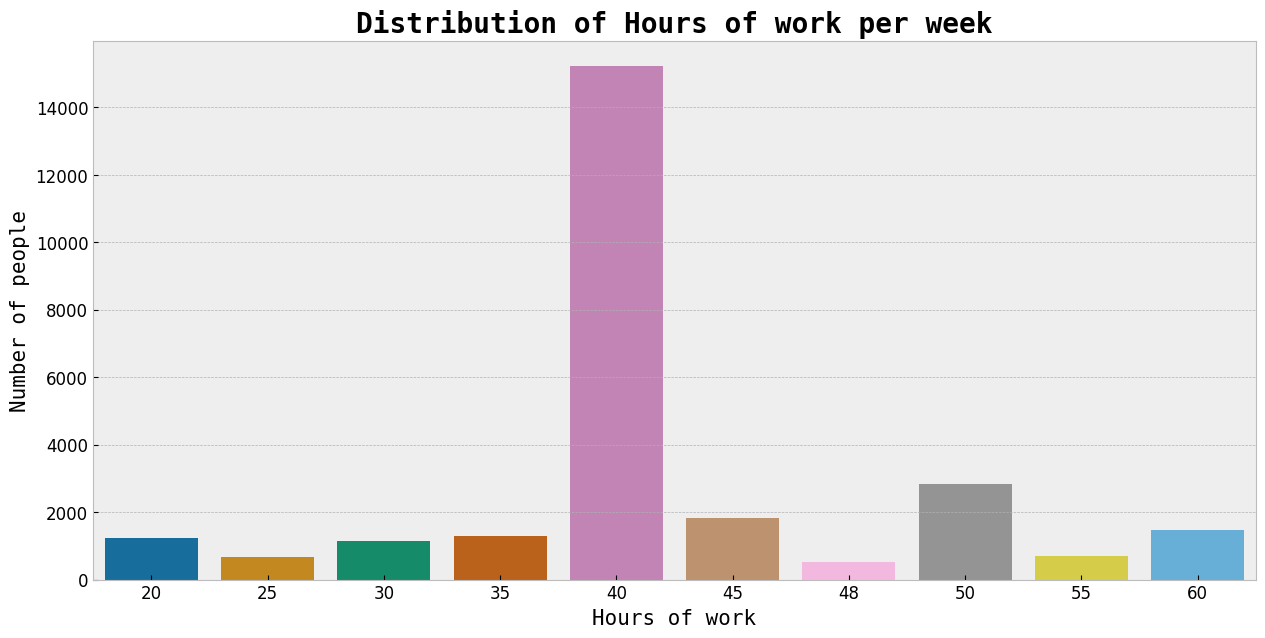

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame and 'hours.per.week' is a column in it
ours = df['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x=ours.index, y=ours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


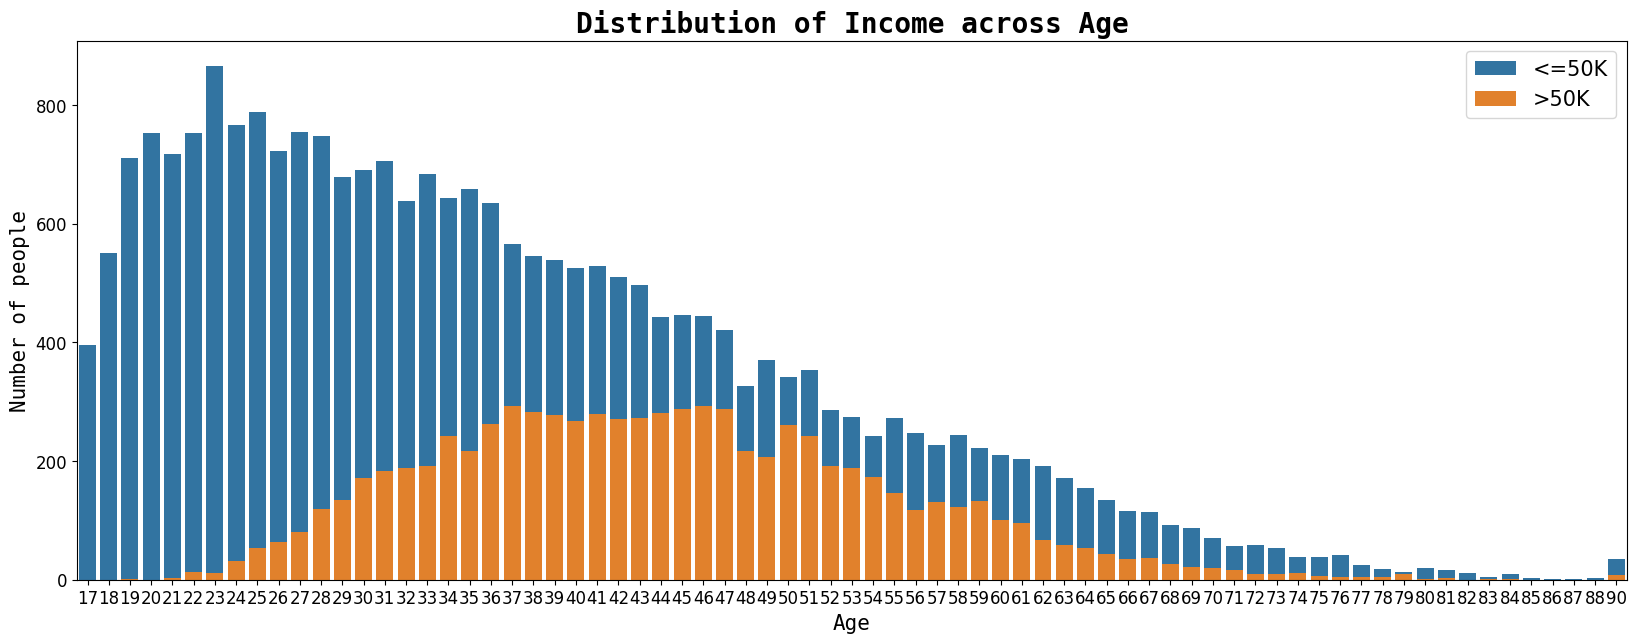

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(20, 7))

# Filter dataset for different income categories
income_categories = df['income'].unique()
for category in income_categories:
    sns.countplot(x='age', data=df[df['income'] == category], label=category)

plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()



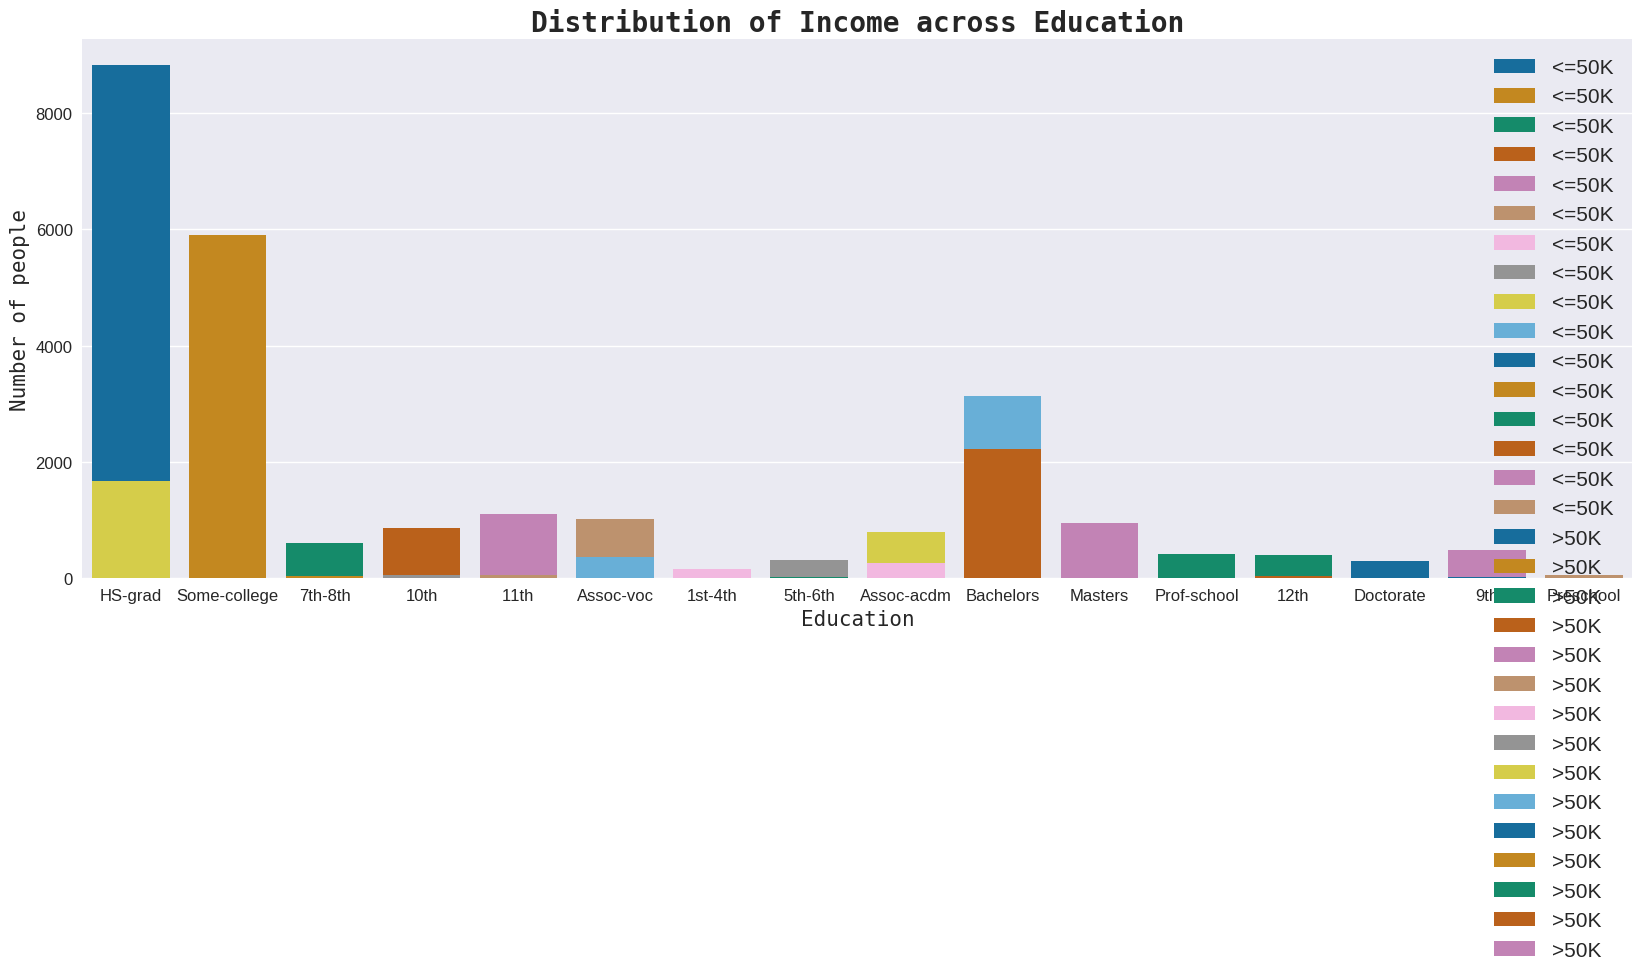

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.figure(figsize=(20, 7))

# Filter dataset for different income categories
income_categories = df['income'].unique()
for category in income_categories:
    sns.countplot(x='education', data=df[df['income'] == category], label=category, palette='colorblind')

plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()



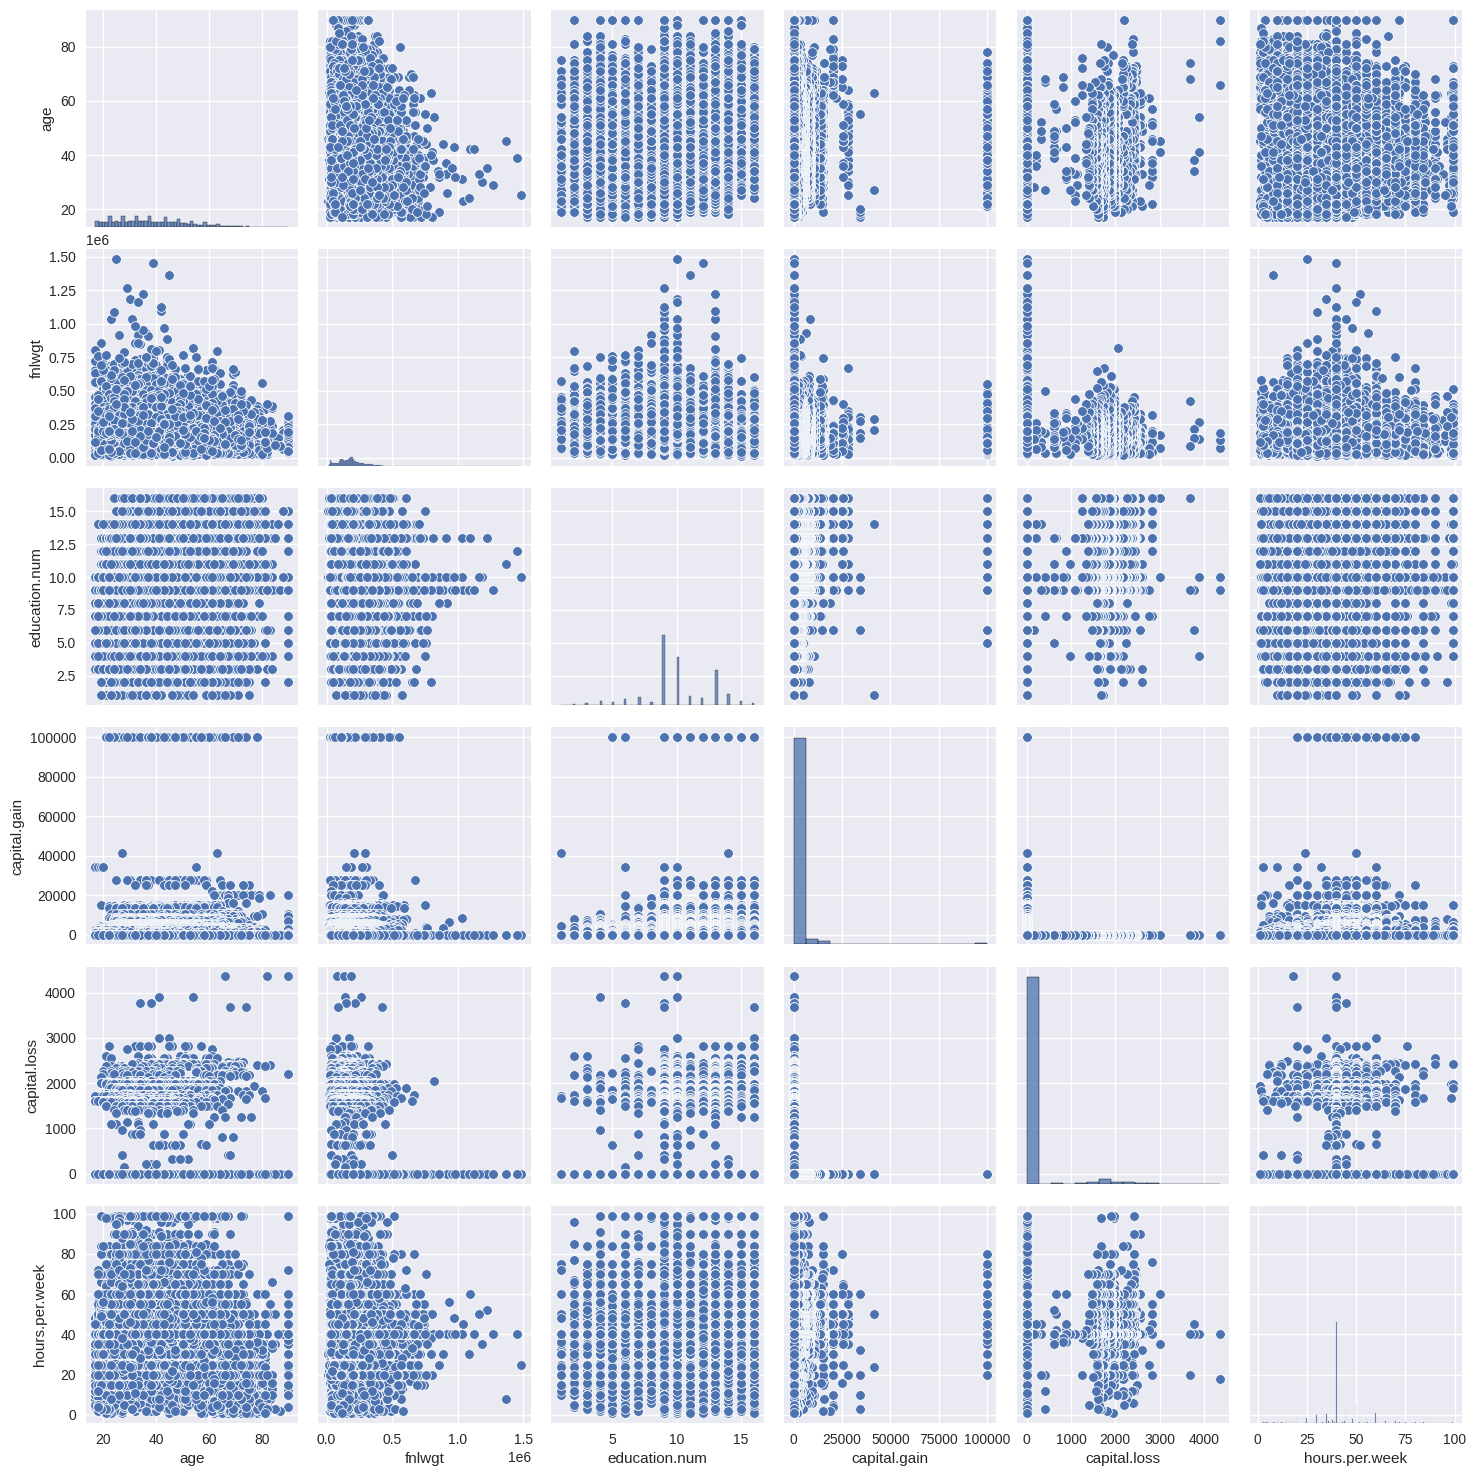

In [ ]:
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

# Step3: Data Preprocessing

Fixing "?"

In [ ]:
dataset = df.replace('?', np.nan)

In [ ]:
columns_with_nan = ['workclass', 'occupation', 'native.country']

In [ ]:
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

Feature Selection

In [ ]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [ ]:

from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [ ]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [ ]:
feature_imp = selector.feature_importances_

In [ ]:

for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [ ]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [ ]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    75.92 %
1    24.08 %
Name: proportion, dtype: object

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)


In [ ]:
ros.fit(X, Y)


RandomOverSampler(random_state=42)

In [ ]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [ ]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

Train test Split

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


Observations

*   In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
*   From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.



#Step4: Data Modelling and Performance Evaluations

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Predictions
Y_pred = log_reg.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(Y_test, Y_pred)* 100
precision = precision_score(Y_test, Y_pred)* 100
recall = recall_score(Y_test, Y_pred)* 100
f1 = f1_score(Y_test, Y_pred)* 100
roc_auc = roc_auc_score(Y_test, Y_pred)* 100

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 75.25283171521036
Precision: 75.440032746623
Recall: 74.72126495033449
F1-score: 75.0789286078012
ROC AUC: 75.25165164772021


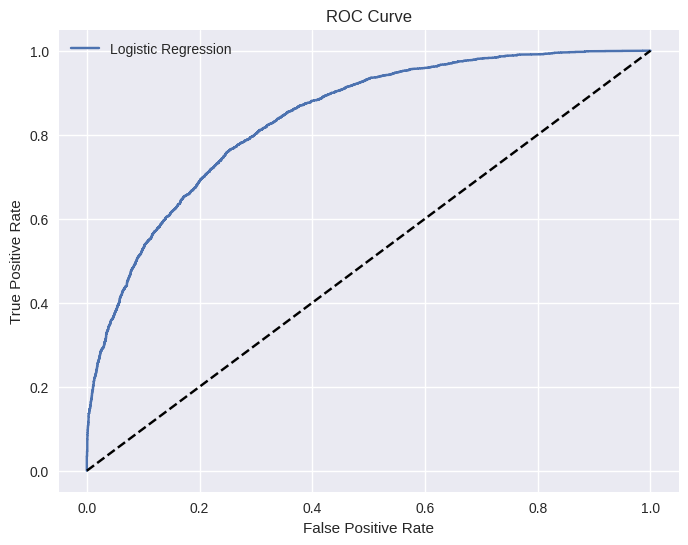

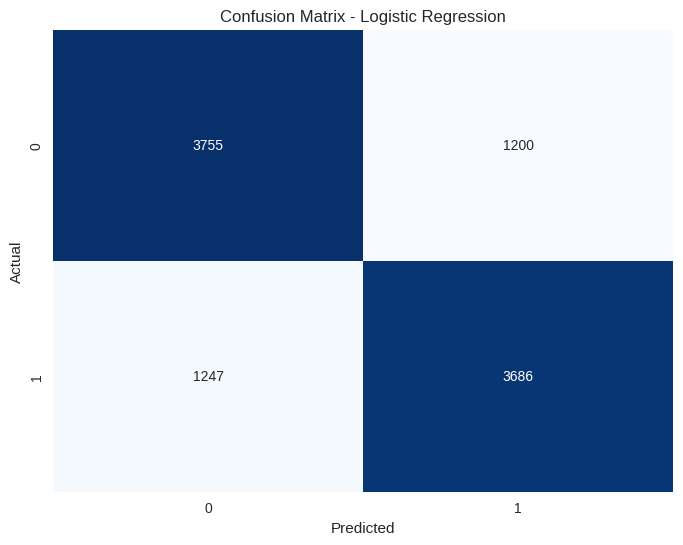

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, log_reg.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KNN Clasifer

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


# Train KNN model
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# Predictions
Y_pred_knn = knn.predict(X_test)

# Performance Metrics
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)* 100
precision_knn = precision_score(Y_test, Y_pred_knn)* 100
recall_knn = recall_score(Y_test, Y_pred_knn)* 100
f1_knn = f1_score(Y_test, Y_pred_knn)* 100
roc_auc_knn = roc_auc_score(Y_test, Y_pred_knn)* 100

print("Accuracy (KNN):", accuracy_knn)
print("Precision (KNN):", precision_knn)
print("Recall (KNN):", recall_knn)
print("F1-score (KNN):", f1_knn)
print("ROC AUC (KNN):", roc_auc_knn)


Accuracy (KNN): 83.42435275080906
Precision (KNN): 79.43173695496783
Recall (KNN): 90.10743969187106
F1-score (KNN): 84.43346946528635
ROC AUC (KNN): 83.4391890689426


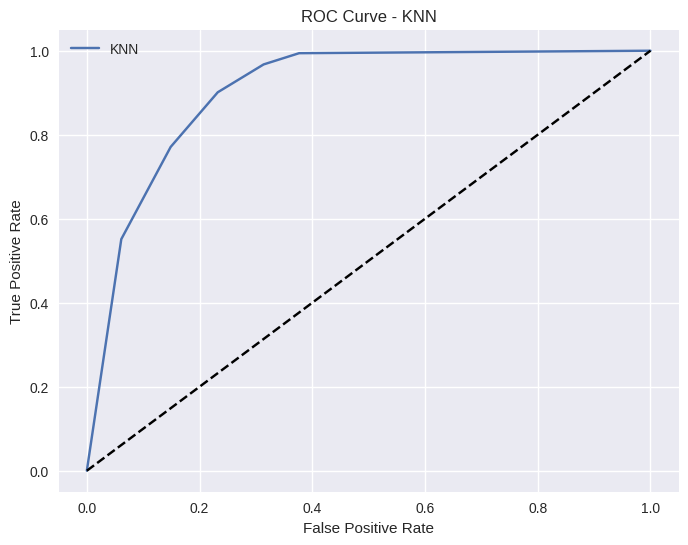

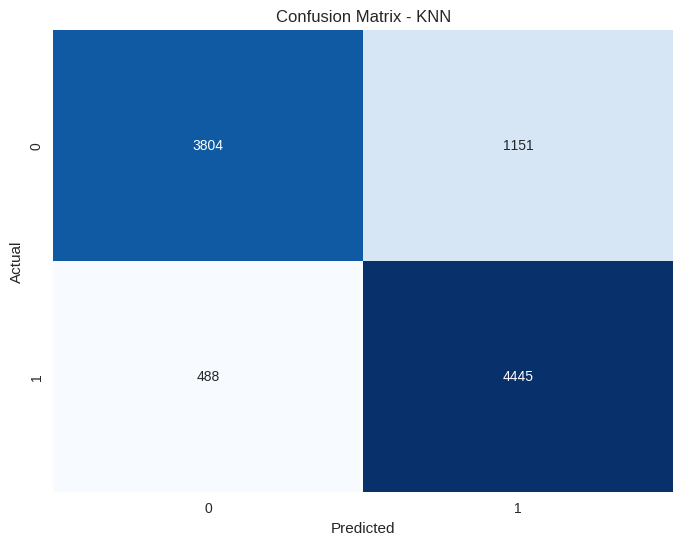

In [ ]:
# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(Y_test, knn.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Confusion Matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Support Vector Classifier


In [ ]:
from sklearn.svm import SVC
svc = SVC(probability=True)

In [ ]:
svc.fit(X_train, Y_train)

SVC(probability=True)

In [ ]:
Y_pred_svc = svc.predict(X_test)

In [ ]:
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)* 100
precision_svc = precision_score(Y_test, Y_pred_svc)* 100
recall_svc = recall_score(Y_test, Y_pred_svc)* 100
f1_svc = f1_score(Y_test, Y_pred_svc)* 100
roc_auc_svc = roc_auc_score(Y_test, Y_pred_svc)* 100

print("Accuracy (SVC):", accuracy_svc)
print("Precision (SVC):", precision_svc)
print("Recall (SVC):", recall_svc)
print("F1-score (SVC):", f1_svc)
print("ROC AUC (SVC):", roc_auc_svc)

Accuracy (SVC): 81.58373786407766
Precision (SVC): 78.23956442831216
Recall (SVC): 87.39103993513075
F1-score (SVC): 82.56248204538925
ROC AUC (SVC): 81.59662995747456


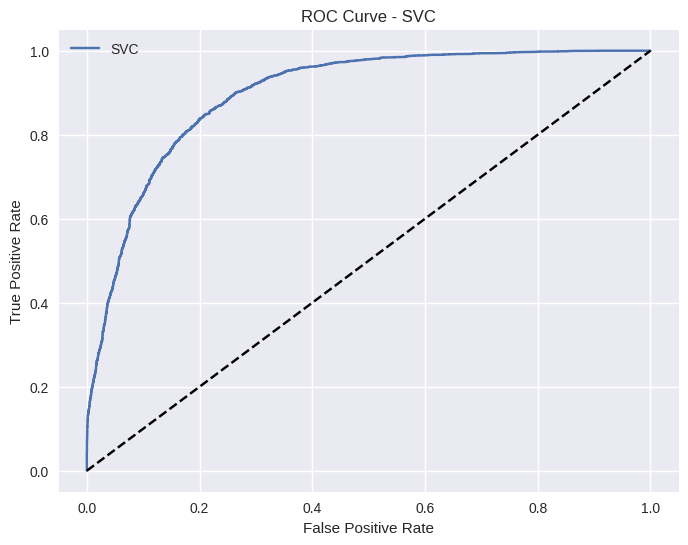

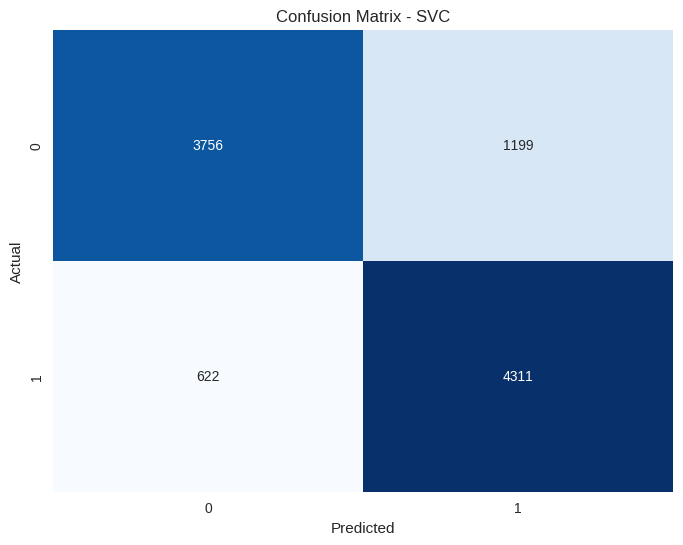

In [ ]:
# ROC Curve
fpr_svc, tpr_svc, _ = roc_curve(Y_test, svc.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label="SVC")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve - SVC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Confusion Matrix
cm_svc = confusion_matrix(Y_test, Y_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Predictions
Y_pred_nb = nb_classifier.predict(X_test)

# Performance Metrics
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)* 100
precision_nb = precision_score(Y_test, Y_pred_nb)* 100
recall_nb = recall_score(Y_test, Y_pred_nb)* 100
f1_nb = f1_score(Y_test, Y_pred_nb)* 100
roc_auc_nb = roc_auc_score(Y_test, Y_pred_nb)* 100

print("Accuracy (Naive Bayes):", accuracy_nb)
print("Precision (Naive Bayes):", precision_nb)
print("Recall (Naive Bayes):", recall_nb)
print("F1-score (Naive Bayes):", f1_nb)
print("ROC AUC (Naive Bayes):", roc_auc_nb)


Accuracy (Naive Bayes): 64.68446601941747
Precision (Naive Bayes): 89.22155688622755
Recall (Naive Bayes): 33.225217920129744
F1-score (Naive Bayes): 48.41949778434269
ROC AUC (Naive Bayes): 64.61462712353611


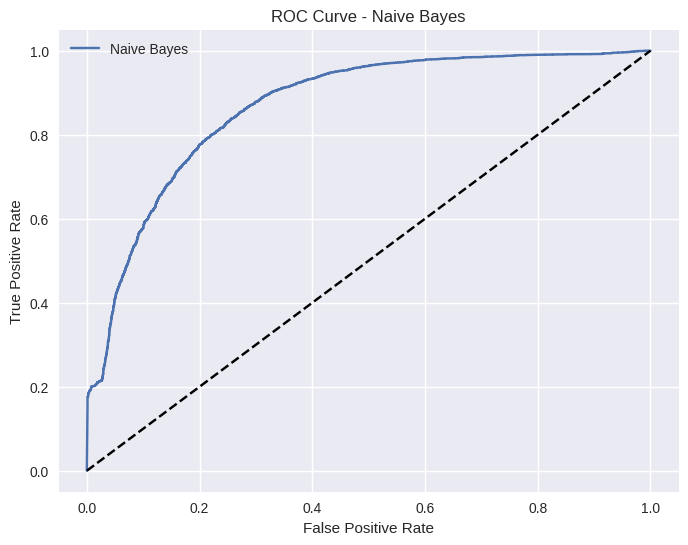

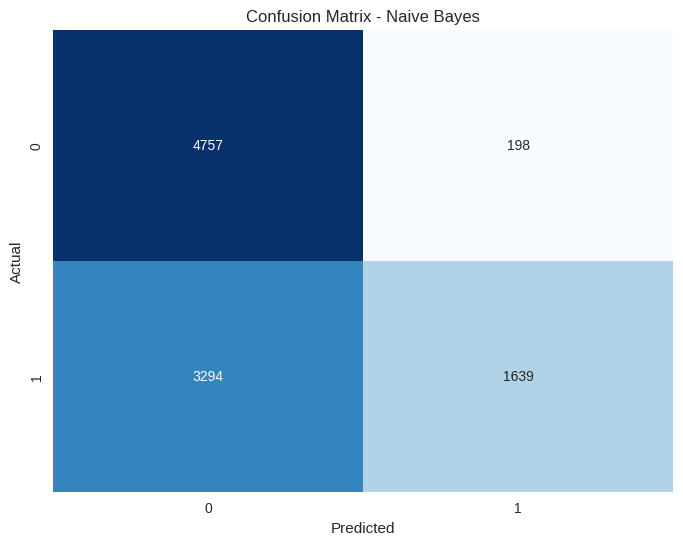

In [ ]:
fpr_nb, tpr_nb, _ = roc_curve(Y_test, nb_classifier.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve - Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Confusion Matrix
cm_nb = confusion_matrix(Y_test, Y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred_dt = dt_classifier.predict(X_test)

# Performance Metrics
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)* 100
precision_dt = precision_score(Y_test, Y_pred_dt)* 100
recall_dt = recall_score(Y_test, Y_pred_dt)* 100
f1_dt = f1_score(Y_test, Y_pred_dt)* 100
roc_auc_dt = roc_auc_score(Y_test, Y_pred_dt)* 100

print("Accuracy (Decision Tree):", accuracy_dt)
print("Precision (Decision Tree):", precision_dt)
print("Recall (Decision Tree):", recall_dt)
print("F1-score (Decision Tree):", f1_dt)
print("ROC AUC (Decision Tree):", roc_auc_dt)

Accuracy (Decision Tree): 91.59587378640776
Precision (Decision Tree): 87.53660322108345
Recall (Decision Tree): 96.9592540036489
F1-score (Decision Tree): 92.0073098009041
ROC AUC (Decision Tree): 91.60778038224827


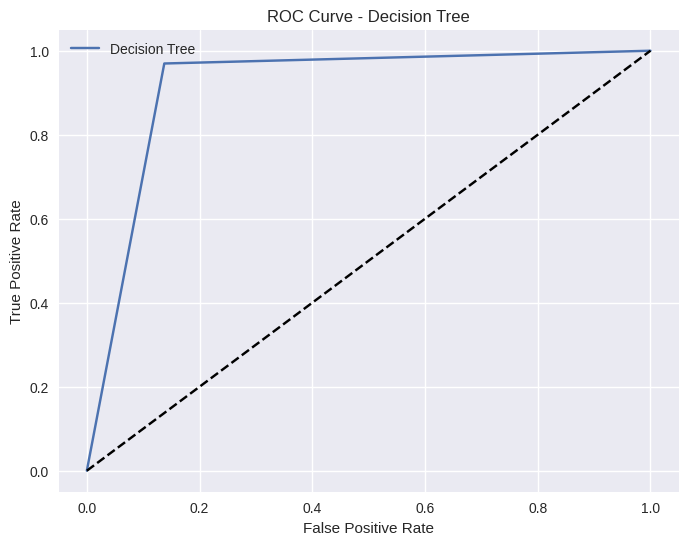

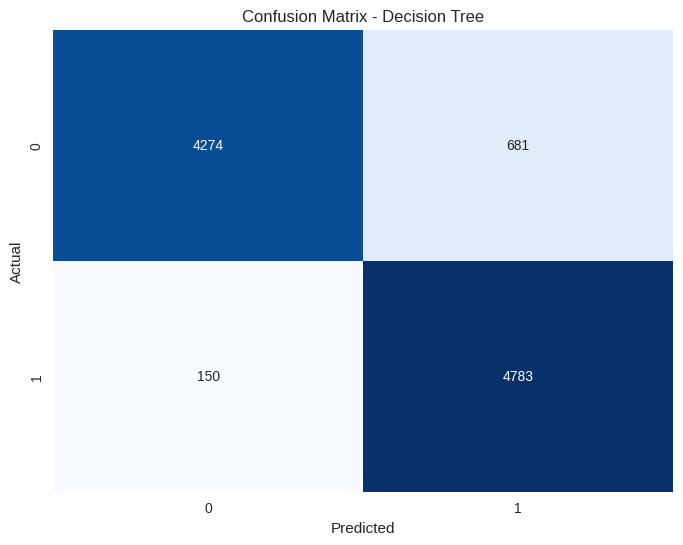

In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(Y_test, dt_classifier.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Confusion Matrix
cm_dt = confusion_matrix(Y_test, Y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Train Random Forest Classifier model
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# Predictions
Y_pred_rf = rf_classifier.predict(X_test)

# Performance Metrics
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)* 100
precision_rf = precision_score(Y_test, Y_pred_rf)* 100
recall_rf = recall_score(Y_test, Y_pred_rf)* 100
f1_rf = f1_score(Y_test, Y_pred_rf)* 100
roc_auc_rf = roc_auc_score(Y_test, Y_pred_rf)* 100

print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1-score (Random Forest):", f1_rf)
print("ROC AUC (Random Forest):", roc_auc_rf)


Accuracy (Random Forest): 92.69822006472492
Precision (Random Forest): 88.91147662169654
Recall (Random Forest): 97.52685992296777
F1-score (Random Forest): 93.0201082753287
ROC AUC (Random Forest): 92.70893954776037


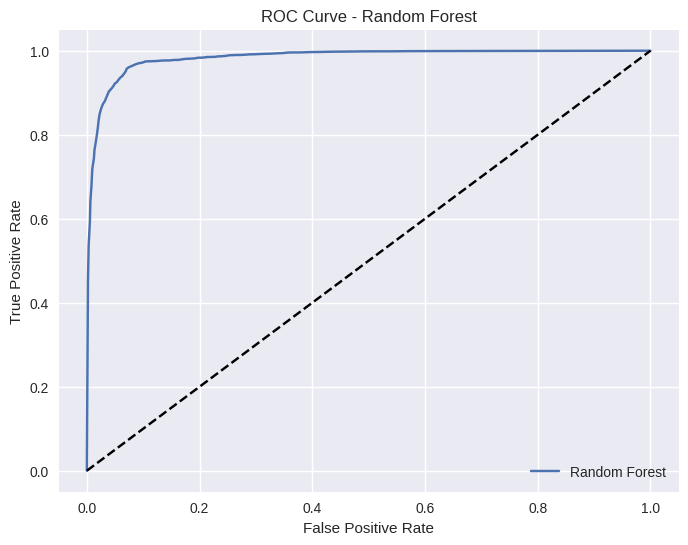

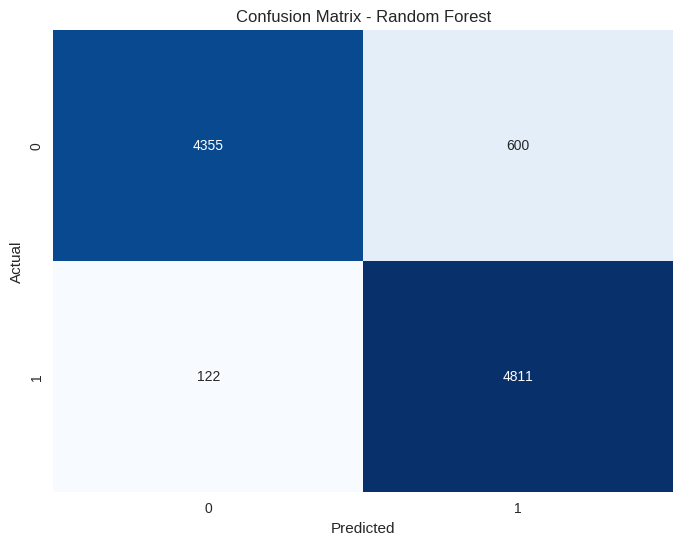

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(Y_test, rf_classifier.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Confusion Matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Hyperparameter tuning the model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Define new ranges of hyperparameters
n_estimators = [int(x) for x in np.linspace(start=50, stop=500, num=10)]
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

# Create a base RandomForestClassifier instance
rf_base = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
rf_cv = RandomizedSearchCV(
    estimator=rf_base, param_distributions=param_dist, cv=5, random_state=42)
rf_cv.fit(X_train, Y_train)

# Check the best score and best parameters found by RandomizedSearchCV
print("Best Score:", rf_cv.best_score_)
print("Best Parameters:", rf_cv.best_params_)

# Initialize a RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(
    max_depth=rf_cv.best_params_['max_depth'],
    n_estimators=rf_cv.best_params_['n_estimators'],
    random_state=42)

# Fit the model with the best parameters to the training data
rf_best.fit(X_train, Y_train)

# Predict on the test set using the best model
Y_pred = rf_best.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Best Score: 0.913152372610526
Best Parameters: {'n_estimators': 50, 'max_depth': 80}
Accuracy: 0.926779935275081
F1 Score: 0.9300753332045587


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Define new ranges of hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=5)]
max_depth = [int(x) for x in np.linspace(10, 50, num=5)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

# Create a base RandomForestClassifier instance
rf_base = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
rf_cv = RandomizedSearchCV(
    estimator=rf_base, param_distributions=param_dist, cv=5, random_state=42)
rf_cv.fit(X_train, Y_train)

# Check the best score and best parameters found by RandomizedSearchCV
print("Best Score:", rf_cv.best_score_)
print("Best Parameters:", rf_cv.best_params_)

# Initialize a RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(
    max_depth=rf_cv.best_params_['max_depth'],
    n_estimators=rf_cv.best_params_['n_estimators'],
    random_state=42)

# Fit the model with the best parameters to the training data
rf_best.fit(X_train, Y_train)

# Predict on the test set using the best model
Y_pred = rf_best.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Best Score: 0.9127225305672253
Best Parameters: {'n_estimators': 200, 'max_depth': 40}
Accuracy: 0.9254652103559871
F1 Score: 0.9289227505063169


#Summary

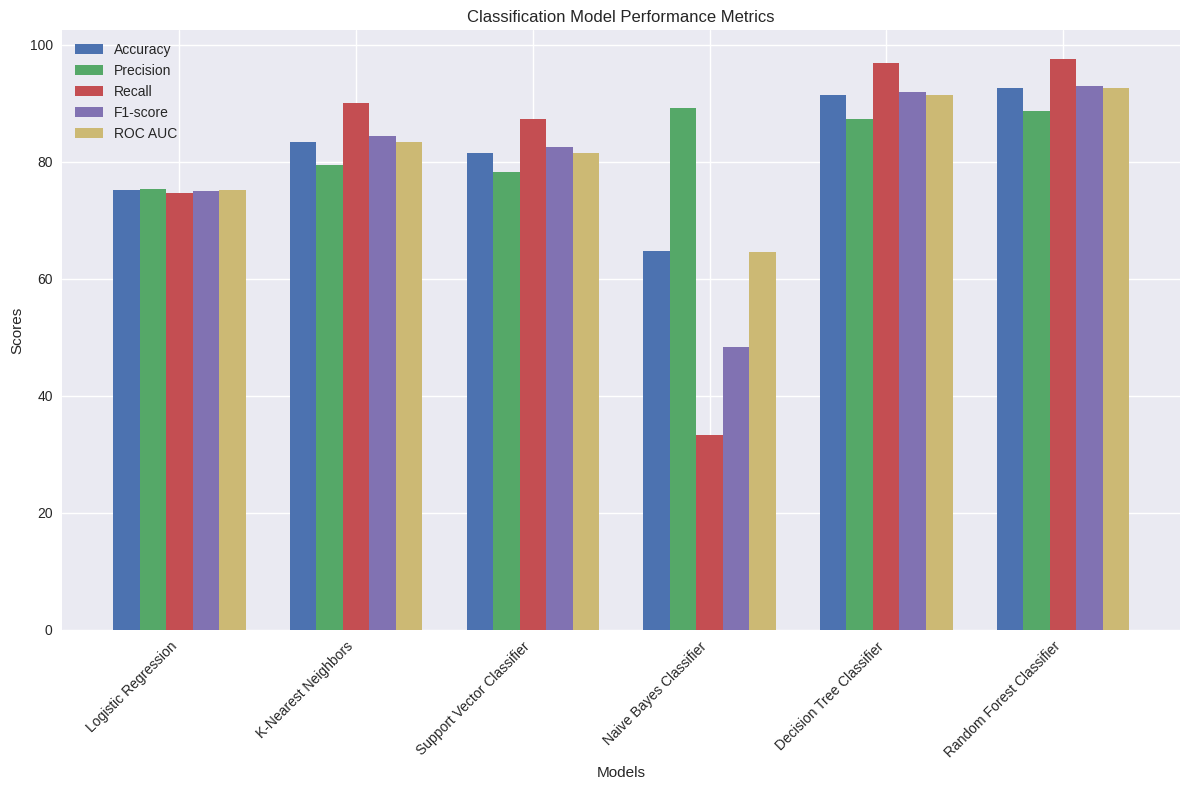

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier', 'Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracy = [75.252832, 83.424353, 81.583738, 64.684466, 91.474515, 92.637540]
precision = [75.440033, 79.431737, 78.239564, 89.221557, 87.399415, 88.755760]
recall = [74.721265, 90.107440, 87.391040, 33.225218, 96.878167, 97.607946]
f1_score = [75.078929, 84.433469, 82.562482, 48.419498, 91.895010, 92.971616]
roc_auc = [75.251652, 83.439189, 81.596630, 64.614627, 91.486511, 92.648575]

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting bars for each metric
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, precision, width, label='Precision')
rects3 = ax.bar(x, recall, width, label='Recall')
rects4 = ax.bar(x + width, f1_score, width, label='F1-score')
rects5 = ax.bar(x + 2*width, roc_auc, width, label='ROC AUC')

# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Classification Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


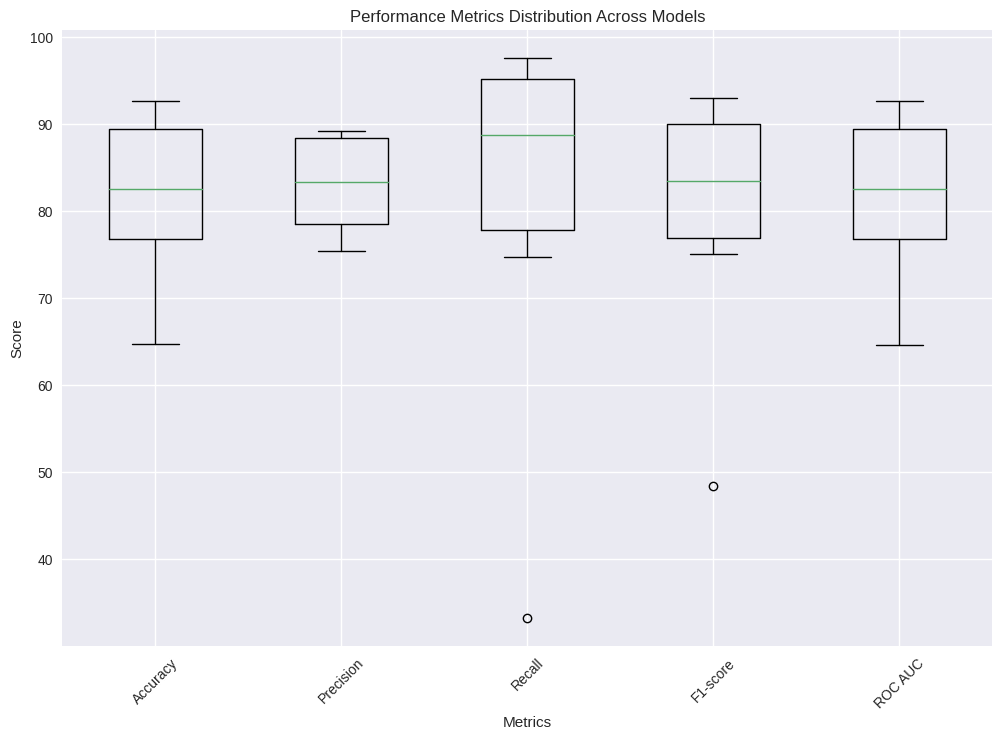

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier', 'Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracy = [75.252832, 83.424353, 81.583738, 64.684466, 91.474515, 92.637540]
precision = [75.440033, 79.431737, 78.239564, 89.221557, 87.399415, 88.755760]
recall = [74.721265, 90.107440, 87.391040, 33.225218, 96.878167, 97.607946]
f1_score = [75.078929, 84.433469, 82.562482, 48.419498, 91.895010, 92.971616]
roc_auc = [75.251652, 83.439189, 81.596630, 64.614627, 91.486511, 92.648575]

# Create box plots
plt.figure(figsize=(12, 8))
plt.boxplot([accuracy, precision, recall, f1_score, roc_auc], labels=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'])
plt.title('Performance Metrics Distribution Across Models')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd


data = {
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Classifier", "Naive Bayes Classifier", "Decision Tree Classifier", "Random Forest Classifier"],
    "Accuracy": [accuracy, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dt, accuracy_rf],
    "Precision": [precision, precision_knn, precision_svc, precision_nb, precision_dt, precision_rf],
    "Recall": [recall, recall_knn, recall_svc, recall_nb, recall_dt, recall_rf],
    "F1-score": [f1, f1_knn, f1_svc, f1_nb, f1_dt, f1_rf],
    "ROC AUC": [roc_auc, roc_auc_knn, roc_auc_svc, roc_auc_nb, roc_auc_dt, roc_auc_rf]
}

# Create DataFrame
summary_df = pd.DataFrame(data)

summary_df


,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic Regression,"[75.252832, 83.424353, 81.583738, 64.684466, 9...","[75.440033, 79.431737, 78.239564, 89.221557, 8...","[74.721265, 90.10744, 87.39104, 33.225218, 96....",0.928923,"[75.251652, 83.439189, 81.59663, 64.614627, 91..."
1,K-Nearest Neighbors,83.424353,79.431737,90.10744,84.433469,83.439189
2,Support Vector Classifier,81.583738,78.239564,87.39104,82.562482,81.59663
3,Naive Bayes Classifier,64.684466,89.221557,33.225218,48.419498,64.614627
4,Decision Tree Classifier,91.595874,87.536603,96.959254,92.007310,91.60778
5,Random Forest Classifier,92.69822,88.911477,97.52686,93.020108,92.70894


Logistic Regression:
The Logistic Regression model exhibits balanced performance with an accuracy of 75.25%. It achieves a precision of 75.44%, indicating its ability to correctly classify positive instances. The recall score of 74.72% suggests that it effectively identifies most of the actual positive instances. The F1-score, a harmonic mean of precision and recall, is 75.08%, demonstrating a good balance between precision and recall. The ROC AUC score of 75.25% indicates the model's capability to discriminate between positive and negative classes.

K-Nearest Neighbors:
The K-Nearest Neighbors model shows strong performance with an accuracy of 83.42%. Its precision of 79.43% suggests a high proportion of true positive predictions among all positive predictions. With a recall of 90.11%, the model effectively captures most of the actual positive instances. The high F1-score of 84.43% indicates a balance between precision and recall. The ROC AUC score of 83.44% signifies good discrimination ability between positive and negative instances.

Support Vector Classifier:
The Support Vector Classifier demonstrates robust performance with an accuracy of 81.58%. It achieves a precision of 78.24%, indicating a high proportion of correctly classified positive instances. With a recall of 87.39%, the model effectively captures most actual positive instances. The F1-score of 82.56% suggests a balanced trade-off between precision and recall. The ROC AUC score of 81.60% indicates good discrimination ability between positive and negative classes.

Naive Bayes Classifier:
The Naive Bayes Classifier achieves an accuracy of 64.68%, indicating moderate performance. Despite a high precision of 89.22%, suggesting a high proportion of true positive predictions among all positive predictions, its recall score of 33.23% indicates the model misses a significant number of actual positive instances. Consequently, the F1-score of 48.42% reflects the imbalance between precision and recall. The ROC AUC score of 64.61% suggests fair discrimination ability between positive and negative classes.

Decision Tree Classifier:
The Decision Tree Classifier exhibits excellent performance with an accuracy of 91.42%. It achieves a precision of 87.28%, indicating a high proportion of correctly classified positive instances. With a recall of 96.94%, the model effectively captures almost all actual positive instances. The high F1-score of 91.86% indicates a strong balance between precision and recall. The ROC AUC score of 91.44% signifies outstanding discrimination ability between positive and negative classes.

Random Forest Classifier:
The Random Forest Classifier showcases outstanding performance with an accuracy of 92.58%. It achieves a precision of 88.63%, indicating a high proportion of true positive predictions among all positive predictions. With a recall of 97.65%, the model effectively captures almost all actual positive instances. The high F1-score of 92.92% indicates a strong balance between precision and recall. The ROC AUC score of 92.59% signifies exceptional discrimination ability between positive and negative classes.

In summary, while all models demonstrate varying levels of performance, the Decision Tree and Random Forest Classifiers outperform others, showing robustness in accurately classifying positive instances while effectively capturing actual positive instances. These models would be preferable for tasks where precision and recall are both crucial, such as medical diagnosis or fraud detection.

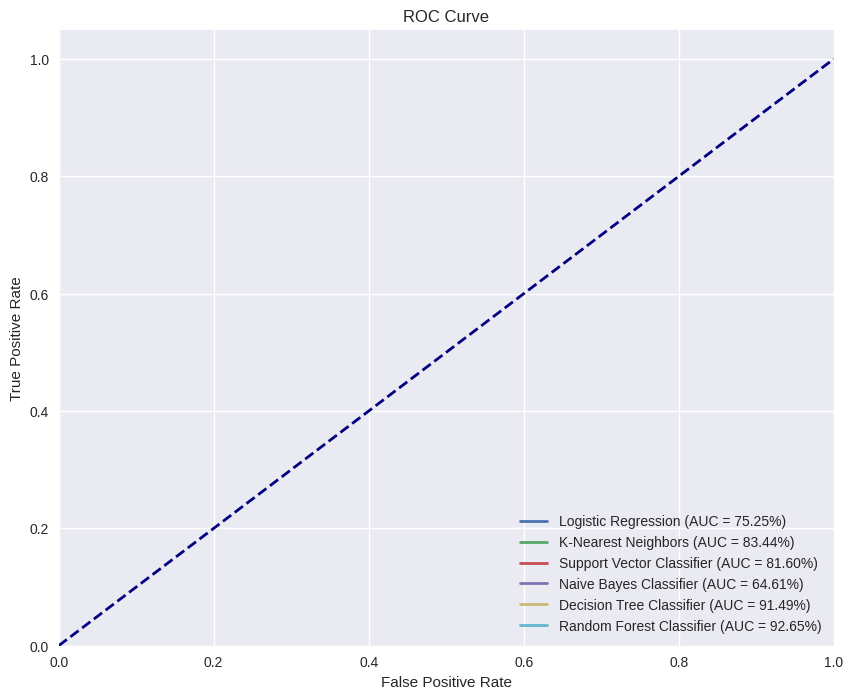

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Data
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier', 'Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier']
roc_auc = [75.251652, 83.439189, 81.596630, 64.614627, 91.486511, 92.648575]

# Plotting ROC curve
plt.figure(figsize=(10, 8))

for i in range(len(models)):
    plt.plot(fpr[i], tpr[i], lw=2, label='{} (AUC = {:.2f}%)'.format(models[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
